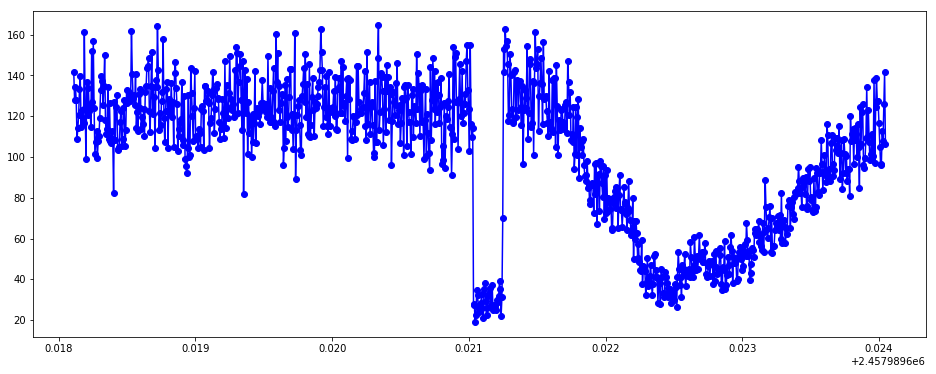

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,6))
df = pd.read_table('photometry_Chariklo_2017Ago23.dat', sep='\s+', header=None)
df.head(10)
np.sqrt(df[3].sum()/len(df))
df[3].describe()
plt.plot(df[2], df[5], 'ko-', color='blue')
plt.show()